
 <h1 style='color:green'>Fraud Detection using Decision Tree Algorithm</h1>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


## importing data

In [2]:
df=pd.read_csv('data.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## data cleaning

In [3]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [4]:
df.shape

(6362620, 11)

In [5]:
type=df['type'].value_counts().reset_index()
type

,type,count
0,CASH_OUT,2237500
1,PAYMENT,2151495
2,CASH_IN,1399284
3,TRANSFER,532909
4,DEBIT,41432


In [6]:
typela=type['type']
typec=type['count']

# data visualisation using pie charts

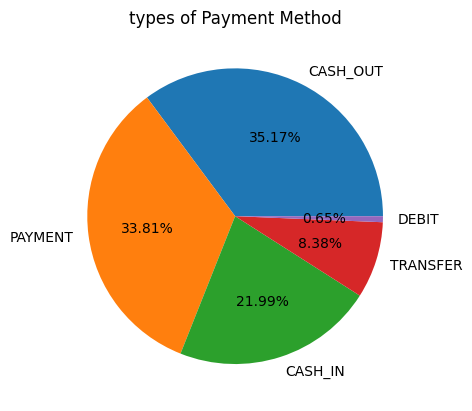

In [7]:
plt.pie(typec,labels=typela,autopct="%1.2f%%")
plt.title("types of Payment Method")
plt.show()

## we analyze that from the above graph highest value of CASH_OUT

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['type']=le.fit_transform(df['type'])

In [29]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [44]:
df['isFraud']=df['isFraud'].replace({0:'False',1:'True'})

In [46]:
x=df[['type', 'amount','oldbalanceOrg', 'newbalanceOrig']]
y=df.isFraud

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.1)

In [48]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [49]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [51]:
model.predict(X_test)

array(['False', 'False', 'False', ..., 'False', 'False', 'False'],
      dtype=object)

In [52]:
model.score(X_test,y_test)

0.9996809490430043

In [54]:
X_test

,type,amount,oldbalanceOrg,newbalanceOrig
3106453,4,40140.76,33936.29,0.00
1191676,0,69314.40,7560883.60,7630198.01
2426616,1,229380.65,9719.00,0.00
459377,1,59463.89,0.00,0.00
3695413,1,126106.65,114661.00,0.00
...,...,...,...,...
2449170,1,301305.08,0.00,0.00
400953,1,273697.25,104858.00,0.00
1695530,0,249847.32,5283575.52,5533422.85
204557,0,45533.85,9555772.88,9601306.72


In [55]:
y_test

3106453    False
1191676    False
2426616    False
459377     False
3695413    False
           ...  
2449170    False
400953     False
1695530    False
204557     False
2612541    False
Name: isFraud, Length: 636262, dtype: object